<a href="https://colab.research.google.com/github/yerinsally/BDA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0312_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 정규식 2

- 정규식 요약 설명
- \d : [0-9]
- \D : [^0-9] : 숫자를 제외한 모든 문자
- \w : [a-zA-Z0-9_]와 같음 영문, 대소문자, 밑줄문자, 숫자
- \W : [^a-zA-Z0-9_]와 같음 영문, 대소문자, 밑줄문자, 숫자 제외한 모든문자


In [1]:
import re

In [2]:
re.match('a*b','b')
# a가 0개 이상 있어도 찾을 수 있음

<re.Match object; span=(0, 1), match='b'>

In [3]:
re.match('a+b','b')
# a가 1개 이상 있어야 찾을 수 있음

In [4]:
re.match('a*b','ab')

<re.Match object; span=(0, 2), match='ab'>

In [5]:
re.match('a+b','ab')

<re.Match object; span=(0, 2), match='ab'>

한글, 문자개수, 영어, 숫자 다 확인
- 특수문자 &&^^%$%$##@@
- \특수문자

In [6]:
# 특수문자 있는 경우
re.search('\*', '123*3')

<re.Match object; span=(3, 4), match='*'>

In [7]:
re.search('\*', '123****3')

<re.Match object; span=(3, 4), match='*'>

In [8]:
# * 별(특수문자)을 다 찾을 경우
re.search('\*+', '123****3') 

<re.Match object; span=(3, 7), match='****'>

In [9]:
re.match('\d','123123123124123123')

<re.Match object; span=(0, 1), match='1'>

In [10]:
re.match('\d+','123123123124123123')

<re.Match object; span=(0, 18), match='123123123124123123'>

In [11]:
# 숫자를 제외한 모든 문자
re.match('\D+','123123123124123123')

In [12]:
re.match('\D+','123123123124123123')

In [13]:
re.search('\D+','123123123124123123dsadfa')

<re.Match object; span=(18, 24), match='dsadfa'>

In [14]:
re.match('\w','Python_Python_123123123123')

<re.Match object; span=(0, 1), match='P'>

In [15]:
re.match('\w+','Python_Python_123123123123')

<re.Match object; span=(0, 26), match='Python_Python_123123123123'>

In [16]:
re.match('\W+','Python_Python_123123123123!!!!!')

In [17]:
re.search('\W+','Python_Python_123123123123!!!!!')

<re.Match object; span=(26, 31), match='!!!!!'>

공백처리
- ' ' 공백을 넣어도 되고, \s \S 로로 표현가능


In [18]:
re.match('[a-z0-9]','hello 12345')

<re.Match object; span=(0, 1), match='h'>

In [19]:
re.match('[a-z0-9]+','hello 12345')

<re.Match object; span=(0, 5), match='hello'>

In [20]:
re.match('[a-z0-9 ]+','hello 12345')

<re.Match object; span=(0, 11), match='hello 12345'>

In [21]:
re.match('[a-z0-9\s]+','hello 12345')

<re.Match object; span=(0, 11), match='hello 12345'>

### Group 사용하기
- (정규표현식)(정규표현식) 덩어리로 묶을 수 있음
- 객체를 넣을 변수.group(그룹의 숫자)

In [23]:
df_re = re.match('([0-9]+) ([a-z]+)', '1234 abc')
df_re

<re.Match object; span=(0, 8), match='1234 abc'>

In [24]:
df_re.group(1)

'1234'

In [25]:
df_re.group(2)

'abc'

In [26]:
df_re.group(0)

'1234 abc'

In [27]:
df_re.groups()

('1234', 'abc')

### 기존함수로 문자열 응용하기
- findall
- re.findall('패턴','문자열')

In [28]:
# 리스트화
re.findall('[0-9]+','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123')

['1231', '123123', '3123']

In [29]:
abc = re.findall('[0-9]+','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123')
abc

['1231', '123123', '3123']

In [30]:
re.findall('[가-힣]+','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123')

['여러분', '숫자를', '다', '가지고', '올', '까요']

문자열을 바꿀 수 있음
- re.sub('패턴', '바꿀문자열', '문자열', 바꿀횟수)

In [32]:
re.sub('[0-9]+','hi','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123')
# 숫자가 모두 hi로 바뀜

'여러분 hi 숫자를 hi 다 가지고 올 까요?!@hi'

In [33]:
# | or 두 개 중에 있으면 바꾸기
re.sub('a|b|e','안녕','a b dedfe a b')

'안녕 안녕 d안녕df안녕 안녕 안녕'

### 퀴즈
- 이메일을 찾을 수 있는 정규식을 만들자!
- 첫 이메일 시작은 영어 소문자만 가능하고 이메일은 abc123 숫자도 붙을 수 있다. (ex. abc_323 가능)
- .com / .net 만 가능
- ex) ppp@naver.com , gmail.com, .net 


In [34]:
re.match('[a-z]{1}\w+@[a-zA-Z]+(\.com|\.net)','abc_123@naver_com')

In [35]:
re.match('[A-Za-z]+[A-Za-z0-9_]*@[A-Za-z]+\.[com|net]+$','Abc_123@naver_com')

# 텍스트 분석
- 문자열 데이터를 분석
- 숫자가 아니라 문자 데이터라서 문자열 데이터를 수치로 만드는 것이 중요
- 문자열 데이터를 어떻게 숫자로 만들 것인가?
- 빈도, 감성분석, 머신러닝으로 예측 -> 문자열 데이터에 대한 형태소를 나눠야 한다.
- 형태소라는 것은 문자데이터에서 주어, 목적어, 서술어 구성성분으로 나눈다.
- 한글 konlp 자연어 관련해서 이미 만든 패키지
- 영어 okt, twitter 등등 형태소를 분석할 수 있는 패키지

In [37]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
survey = pd.read_csv('/content/drive/MyDrive/[BDAA 5기] 데이터 분석 기초반/데이터셋/survey_설문지.csv')
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [39]:
survey['comment']
# 서베이에 대한 응답 데이터 따라서 단순하게 인코딩하기는 어렵다.

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

In [40]:
survey.isna().sum() 

datetime        0
comment         2
satisfaction    0
dtype: int64

In [41]:
survey = survey.dropna()

In [42]:
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

데이터 프레임을 가지고 접근 : str 문법 사용

In [43]:
survey['comment'] = survey['comment'].str.replace('[a-zA-Z]',"")

<ipython-input-43-e5efc7fc8200>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  survey['comment'] = survey['comment'].str.replace('[a-zA-Z]',"")
<ipython-input-43-e5efc7fc8200>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment'] = survey['comment'].str.replace('[a-zA-Z]',"")


In [44]:
survey['comment'] = survey['comment'].str.replace('\(.+?\)',"")
# 괄호 안에 있는 값을 모두 날려버리기

<ipython-input-44-ef86a169f094>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  survey['comment'] = survey['comment'].str.replace('\(.+?\)',"")
<ipython-input-44-ef86a169f094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment'] = survey['comment'].str.replace('\(.+?\)',"")


In [45]:
survey['length'] = survey['comment'].str.len()
survey

<ipython-input-45-7c87b0f9f4bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['length'] = survey['comment'].str.len()


,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


(array([20., 19., 20., 10.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

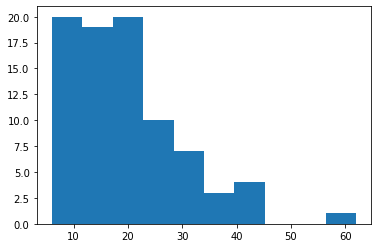

In [46]:
import matplotlib.pyplot as plt
plt.hist(survey['length'])

### 형태소 분석
- pip install 에러 코드 확인
- 설치가 잘 안된다면 konlpy 이걸 설치해야 해서 에러나는 걸 구글링해서 해결

In [63]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 19.0 MB/s eta 0:00:00


In [64]:
import konlpy
konlpy.__version__

'0.6.0'

In [65]:
from konlpy.tag import Twitter

In [66]:
twt = Twitter()
text = '여러분 정규식 많이 어렵나요? 표정이 밝지 못 해서 제 마음도 너무 슬프네요! 그래도 파이팅!!'
tagging = twt.pos(text)
tagging

/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('여러분', 'Noun'),
 ('정규식', 'Noun'),
 ('많이', 'Adverb'),
 ('어렵나요', 'Adjective'),
 ('?', 'Punctuation'),
 ('표정', 'Noun'),
 ('이', 'Josa'),
 ('밝지', 'Verb'),
 ('못', 'Noun'),
 ('해서', 'Verb'),
 ('제', 'Noun'),
 ('마음', 'Noun'),
 ('도', 'Josa'),
 ('너무', 'Adverb'),
 ('슬프네요', 'Adjective'),
 ('!', 'Punctuation'),
 ('그래도', 'Adverb'),
 ('파이팅', 'Noun'),
 ('!!', 'Punctuation')]

survey 데이터에서 내가 원하는 품사만 추출해서 가져와보기

In [67]:
survey

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [68]:
all_words = []
parts =['Noun']
for i in range(len(survey)):
    text = survey['comment'].iloc[i]
    words = twt.pos(text)
    words_arr = []
    for n in words:
        if n =='EOS' or n =="":continue
        word_tmp = n[0]
        part = n[1]
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

In [69]:
all_words

['역앞',
 '젊은이',
 '운동',
 '수',
 '장소',
 '것',
 '육아',
 '지원이',
 '어린이집',
 '바로',
 '입원',
 '수',
 '역앞',
 '상가',
 '생활',
 '놀',
 '장소',
 '놀',
 '장소',
 '상업시설',
 '좀',
 '더',
 '병원',
 '사이클링',
 '코스',
 '축제',
 '좀',
 '더',
 '성대',
 '초등학교',
 '공원',
 '더',
 '근처',
 '공원',
 '살기',
 '슈퍼',
 '육아',
 '데이트',
 '명소',
 '상가',
 '좀',
 '더',
 '밤길',
 '쓰레기',
 '처리',
 '영화관',
 '가로수',
 '더',
 '공원',
 '추가',
 '관광',
 '명소',
 '육아',
 '최고',
 '길이',
 '시내',
 '접근성',
 '집세',
 '합리',
 '의',
 '교통',
 '체증',
 '게',
 '해',
 '상가',
 '지붕',
 '비',
 '큰일',
 '상가',
 '더',
 '카페',
 '스포츠',
 '센터',
 '자주',
 '이용',
 '스포츠',
 '센터',
 '이용',
 '요금',
 '워킹맘',
 '지원',
 '더',
 '버스',
 '별로',
 '안',
 '자전거',
 '달리기',
 '달리기',
 '운동',
 '수',
 '장소',
 '기업',
 '역앞',
 '주차장',
 '아저씨',
 '말',
 '적',
 '경찰',
 '순찰',
 '더',
 '소방',
 '활동',
 '수',
 '재난',
 '시',
 '피난',
 '장소',
 '것',
 '요즘',
 '강',
 '범람',
 '피해',
 '크게',
 '이',
 '도시',
 '범람',
 '방지',
 '취하',
 '설명',
 '신호등',
 '사거리',
 '때문',
 '사고',
 '신호',
 '상가',
 '활성화',
 '활동',
 '좀더',
 '행정',
 '뒷받침',
 '아이',
 '놀',
 '장소',
 '역앞',
 '자전거',
 '주차장',
 '가로수',
 '낙엽',
 '청소',
 '가로수',
 '재해',
 '시',
 '비축',

In [70]:
# count
all_words_df = pd.DataFrame({'words':all_words, 'count':len(all_words)*[1]})
all_words_df

,words,count
0,역앞,1
1,젊은이,1
2,운동,1
3,수,1
4,장소,1
...,...,...
278,놀이기구,1
279,공원,1
280,더,1
281,역앞,1


In [71]:
all_words_df.groupby('words').sum()

,count
words,
가로수,3
강,1
거리,1
걱정,1
걸,1
...,...
확인,1
확장,1
활기,1


### 불용어 처리해보기
- 불용어 : 의미 없는 단어 형태로 나누다 보면 수 잘못 나눠진 단어들
- 불용어들을 제거하고 다시 분석을 하기
- 불용어 제거 -> 불용어 사전 / 원하는 불용어를 직접 제거하는 법 가능

In [72]:
words_df_1 = all_words_df.groupby('words').sum()
words_df_1

,count
words,
가로수,3
강,1
거리,1
걱정,1
걸,1
...,...
확인,1
확장,1
활기,1


In [73]:
words_df_1.sort_values('count',ascending = False).head(20)

,count
words,
더,14
수,7
장소,6
주차장,5
좀,5
역앞,5
상가,5
공원,5
시,4


- 수업의 예를 위해서 "더, 수, 좀" 선정

In [74]:
stop_words = ['더','수','좀','시','놀']
all_words = []
parts =['Noun']
satisfaction = []

for i in range(len(survey)):
    text = survey['comment'].iloc[i]
    words = twt.pos(text)
    words_arr = []
    for n in words:
        if n =='EOS' or n =="":continue
        word_tmp=n[0]
        part = n[1]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
        satisfaction.append(survey['satisfaction'].iloc[i])
    all_words.extend(words_arr)
print(all_words)

all_words_df_t = pd.DataFrame({'words':all_words, 'satisfaction':satisfaction, 
                               'count':len(all_words)*[1]})

['역앞', '젊은이', '운동', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '역앞', '상가', '생활', '장소', '장소', '상업시설', '병원', '사이클링', '코스', '축제', '성대', '초등학교', '공원', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '밤길', '쓰레기', '처리', '영화관', '가로수', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '소방', '활동', '재난', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '비축', '상황', '보도', '길이', '지역', '자치', '단체', '지원', '자치', '단체', '활동', '안심', '살', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공', '주차장', '보행자', '용', '신호', '노인', '어린이', '생각', '설정', '급행', '시내', '버스', '노선', '봄', '벚꽃', '길이', '최고', 

In [75]:
# 만족도 점수가 높은 경우 어떤 Words있나?
all_words_df_t.groupby('words').sum()['satisfaction']

words
가로수     5
강       3
거리      5
걱정      2
걸       2
       ..
확인      5
확장      1
활기      4
활동     10
활성화     1
Name: satisfaction, Length: 182, dtype: int64

만족도 점수를 기반으로 해서 코사인 유사도, 다양한 기술적인 지표가 있음
- 코사인 유사도로 리뷰에 대한 분석을 진행하려고 함

In [77]:
words_sf = all_words_df_t.groupby('words').mean()['satisfaction']
words_count = all_words_df_t.groupby('words').sum()['count']
words_df = pd.concat([words_sf, words_count], axis=1)
words_df

,satisfaction,count
words,,
가로수,1.666667,3
강,3.000000,1
거리,5.000000,1
걱정,2.000000,1
걸,2.000000,1
...,...,...
확인,5.000000,1
확장,1.000000,1
활기,4.000000,1


In [78]:
# 카운트가 많이 나오는 걸 기준으로 데이터 추리기
words_df = words_df[words_df['count'] >= 3]
words_df

,satisfaction,count
words,,
가로수,1.666667,3
공원,2.200000,5
관공서,3.500000,4
길이,3.500000,4
상가,2.200000,5
역앞,1.200000,5
육아,4.333333,3
장소,3.000000,6
주차장,1.000000,5


In [80]:
# 형태소 나눈 것을 하나의 데이터프레임으로 만들어서 값을 계산할 수 있게 만든다.
parts =['Noun']
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey['comment'].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for i in words:
        if i =='EOS' or i =='':continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        words_df[word_tmp]=[1] # 형태소로 나눈 것들은 다 1로 넣기
    all_words_df = pd.concat([all_words_df, words_df],ignore_index =True)

In [81]:
all_words_df = all_words_df.fillna(0)
all_words_df

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 코사인 유사도
- 코사인 유사도를 만들기 위해 데이터 정리를 해야 함
- 코사인 유사도를 통해 어떤 리뷰가 거리 기반으로 가까운지 확인하기 위해 target을 정해야 한다.

In [82]:
# target 선정 : 원하는 타겟 값을 기준으로 변경 가능
survey['comment'].iloc[1]
target_text = all_words_df.iloc[1]

In [83]:
survey['comment'].iloc[1]

'운동할 수 있는 장소가 있는 것이 좋다'

In [84]:
print(target_text)

역앞      0.0
젊은이     0.0
운동      1.0
수       1.0
장소      1.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 1, Length: 187, dtype: float64


In [ ]:
#all_words_df= all_words_df.drop('cos_sim',axis = 'columns')

In [85]:
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
cos_text

역앞      1.0
젊은이     0.0
운동      0.0
수       0.0
장소      0.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 83, Length: 187, dtype: float64

In [86]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text)*np.linalg.norm(cos_text)) # 코사인 유사도 식 구글링
    cos_sim.append(cos)
    
all_words_df['cos_sim'] = cos_sim
all_words_df.sort_values('cos_sim',ascending=False).head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
36,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000
41,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447214
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353553
49,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675


In [87]:
# 위의 결과값을 인덱스 기준으로 리뷰 유사도 비슷한 내용 확인 가능
print(survey['comment'].iloc[1])
print(survey['comment'].iloc[36])

운동할 수 있는 장소가 있는 것이 좋다
달리기같은 운동할 수 있는 장소가 많다.


 형태소 분석 후 워드카운팅, 워드클라우드 진행